In [1]:
# Datascience libraries
import pandas as pd
import numpy as np

# basic python libraries
import math
import time
import random
import json
from tqdm.notebook import tqdm as pb

# plot
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 16, 10

import pants
from sklearn.cluster import KMeans

In [2]:
#Parser de fichiers
df = pd.read_csv("data.txt",header=None)
M = df.values
df.head()

,0,1,2,3
0,0,-11.03,-82.33,46
1,1,-4.93,-98.05,96
2,2,81.52,2.41,49
3,3,36.82,-42.62,71
4,4,-69.86,11.88,27


In [3]:
nodes = []
for i in range(10):
    nodes.append((M[i, 1], M[i, 2]))
    
def euclidean(a, b):
    return math.sqrt(pow(a[1] - b[1], 2) + pow(a[0] - b[0], 2))

In [4]:
world = pants.World(nodes, euclidean)

In [5]:
solver = pants.Solver()
solution = solver.solve(world)

In [6]:
print(solution.distance)

589.1835320894475


In [25]:
new_M = []
window_range = (10,10)
pos = (0,0)
for i in range(M.shape[0]):
    if M[i,1] <= pos[0] + window_range[0] and M[i,1] >= pos[0] - window_range[0]:
        if M[i,2] <= pos[1] + window_range[1] and M[i,2] >= pos[1] - window_range[1]:
            new_M.append(M[i])
new_M = np.array(new_M)
print(new_M.shape[0])

100


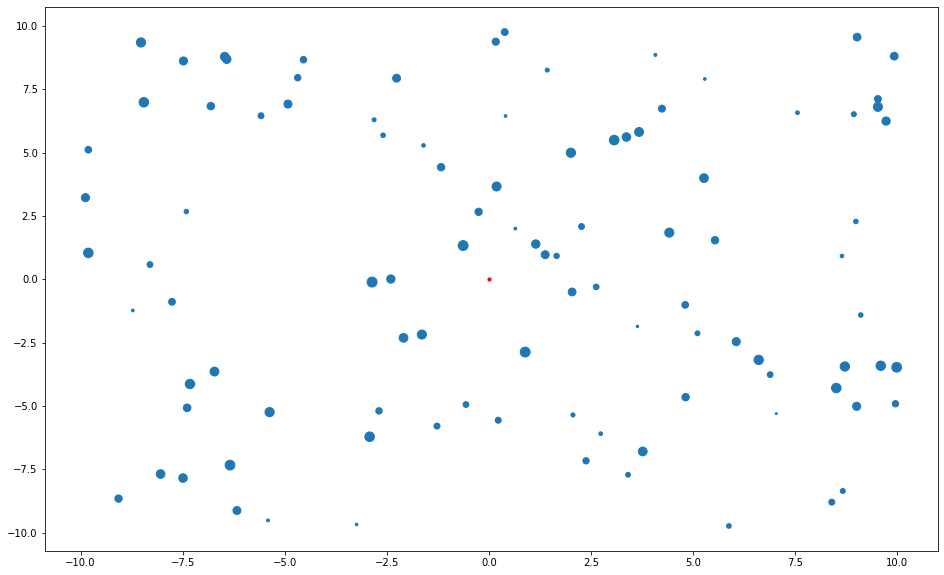

In [26]:
plt.scatter(new_M[:, 1], new_M[:, 2], s=1*new_M[:, 3])
plt.scatter(pos[0], pos[1], s=10, c='r')

In [28]:
temp = [(new_M[j,1], new_M[j,2]) for j in range(new_M.shape[0])]

In [30]:
world = pants.World(temp, euclidean)
solver = pants.Solver()
solution = solver.solve(world)
print(solution.distance, np.sum(new_M[:,3]))

237.8540764344144 5187.0


In [ ]:
def createpath(li, distance_max, M):
    